# Project Intro
<sub>Inspired by: [codebasics](https://www.youtube.com/watch?v=rdfbcdP75KI&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg)</sub><br><br>

This Project utilizes Regression models to predict housing prices in the Seattle area based on sales data from 2014-2015.
The model that performs the best will be deployed with Flask on AWS EC2. 

In this case, the Linear Regression model ultimately performs best, and consequently, the four assumptions of Linear Regression are tested. 
After finding that two of the assumptions are violated, the label data `price` is log-transformed, the Linear Regression model is retrained, the assumptions are re-tested, and a final analysis is conducted. 

The web app is simply designed and outputs a predicted price based on the user's inputs (square footage, number of bedrooms, etc.).


## Project Outline

1. EDA & Data Cleaning
2. Machine Learning
3. Preliminary Results
4. Log-Transform `Price` & Retrain Best Model
5. Conclusion
6. Export Model for Deployment

## Links

[Dataset](https://github.com/stevenjacoballen/House_Price_Predictor/blob/main/housing_data.csv)  
[Web App](http://ec2-50-17-105-101.compute-1.amazonaws.com/)

# 1. EDA & DATA CLEANING

Let's start by reading the data into a DataFrame

In [1]:
import pandas as pd

# See all columsn of df
pd.set_option('display.max_columns', None)

# Import and Preview Data
df = pd.read_csv('housing_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's get a better understanding of the data types for each column and check for any missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Fortunately, there are no missing values.
The data types look appropriate as well, with the exception of `date`. 
This is not of any concern as `date` will not be used in this project. 

Further insight into the data is possible by reviewing summary statistics. 

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As can be seen in the `mean` row, the average house is roughly:   
* 3 bedrooms
* 2 bathrooms
* 2080 sqft
* Sold for $540,000 

This seems reasonable for the Seattle area during 2014/2015. 

**Note**: There appears to be a house with 33 bedrooms, per the `max` `bedroom` value.  
This is suspicious as the largest house only has 8 bathrooms and 13,540 sq ft.  
33 bedrooms is likely an outlier, which will be addressed below.

Next, visually representing the data can assist with quickly identifying patterns in the data.

As the scope  of this project is limited to what a consumer would input into a Zillow-type app, the columns that will be
utilized in this project are: `price` `bedrooms` `bathrooms` `sqft_living` `waterfront` `sqft_basement` `yr_renovated` and `zipcode` 

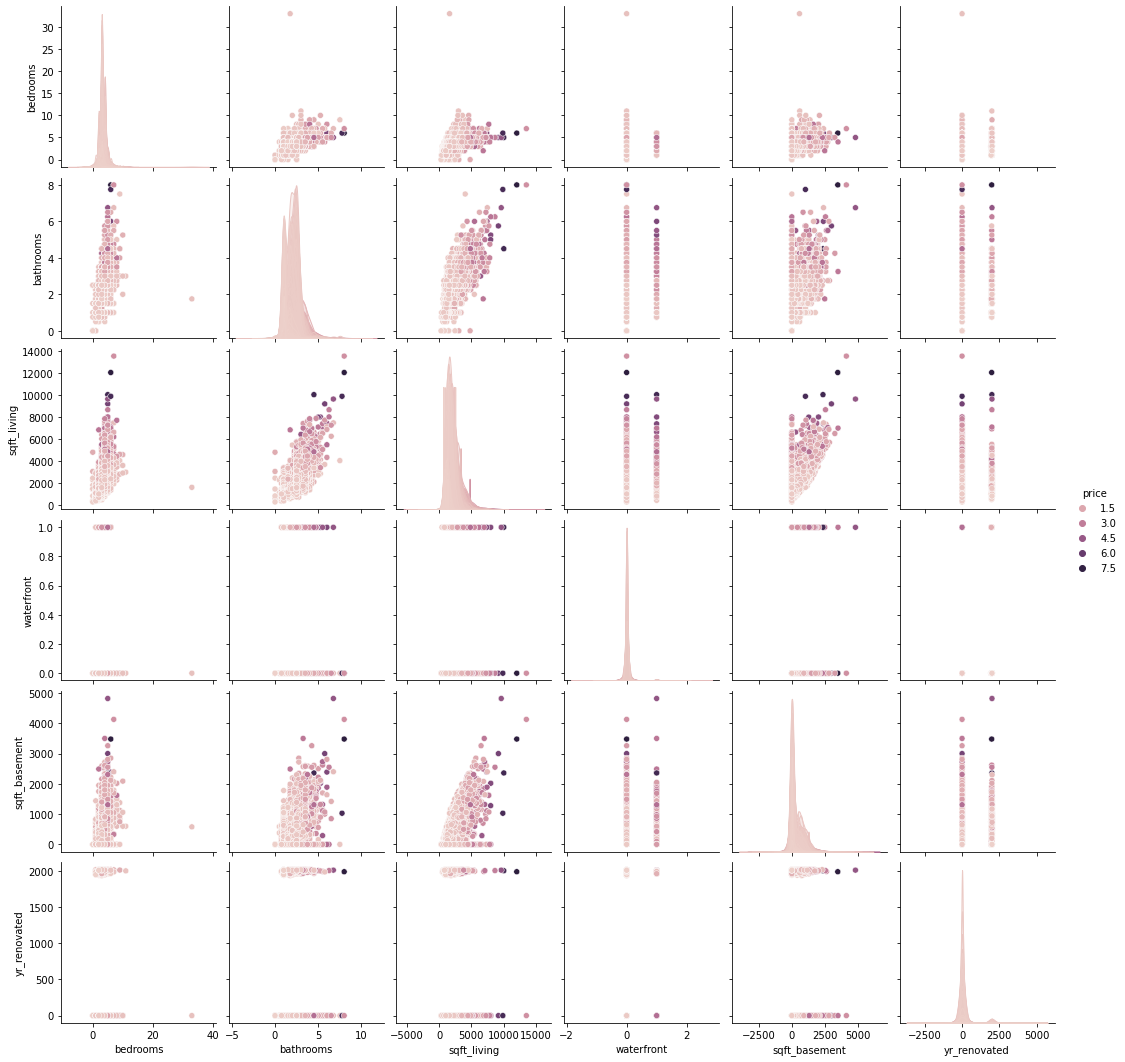

In [4]:
import seaborn as sns

pair_plot = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_renovated']]
sns.pairplot(pair_plot, hue='price')

Linear patterns can be seen in both the structure of the data, and in the hue-gradients of `price`.  
`price` generally increases from left to right, or up and to the right, depending on the features. As such, a `Linear Regression` model will likely be the most optimal model for this project, but others will be tested as well, out of curiosity.

## Outlier Removal

Box plots can be utilized to check a few key features for outliers.

<AxesSubplot:xlabel='price'>

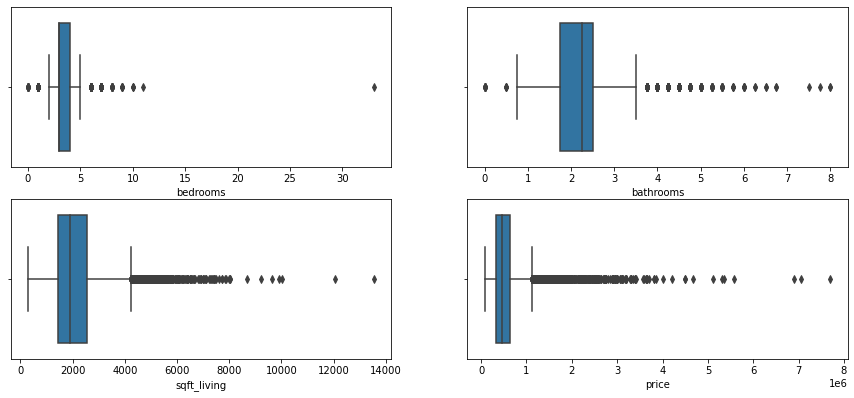

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.boxplot(x=df['bedrooms'])
plt.subplot(3, 2, 2)
sns.boxplot(x=df['bathrooms'])
plt.subplot(3, 2, 3)
sns.boxplot(x=df['sqft_living'])
plt.subplot(3, 2, 4)
sns.boxplot(x=df['price'])

As indicated by the 'dots' in each box plot, every feature contains outliers.  
**Note**: The house with 33 bedrooms can be seen in the bedrooms box plot. This is clearly an outlier/incorrect entry.

Removing outliers with z-score's of absolute values of 3+ will result in a much more representative dataset to work with. This will reduce the model's accuracy when predicting prices for larger (non-representative) houses, but it will increase the accuracy when predicting the price for houses that are closer to the representative population. For the purposes of this project, this is a worthwhile trade-off. 

<AxesSubplot:xlabel='price'>

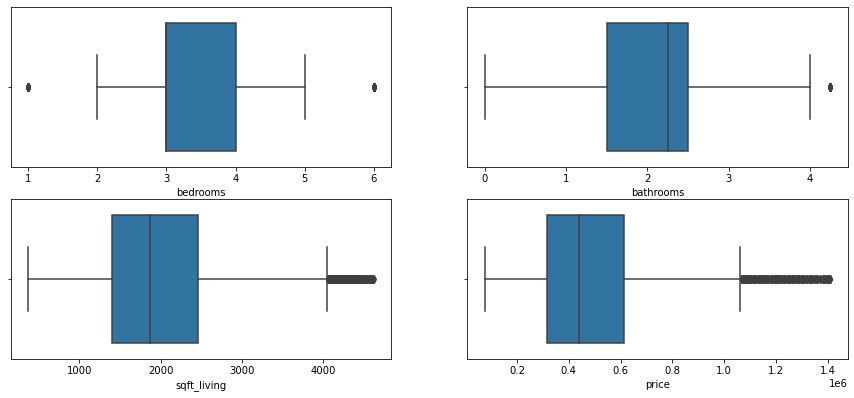

In [6]:
import numpy as np
from scipy import stats

# Remove outliers. Only keep data with zscores (absolute value) < 3.

df = df[(np.abs(stats.zscore(df.bedrooms)) < 3)]
df = df[(np.abs(stats.zscore(df.bathrooms)) < 3)]
df = df[(np.abs(stats.zscore(df.sqft_living)) < 3)]
df = df[(np.abs(stats.zscore(df.price)) < 3)]


# Replot features

fig, ax = plt.subplots(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.boxplot(x=df['bedrooms'])
plt.subplot(3, 2, 2)
sns.boxplot(x=df['bathrooms'])
plt.subplot(3, 2, 3)
sns.boxplot(x=df['sqft_living'])
plt.subplot(3, 2, 4)
sns.boxplot(x=df['price'])

Removing the outliers has resulted in a much more representative dataset to work with. 

**Note**: `bathroom` has a minimum value of 0.   
Intuitively, most people will want a house with at least one bathroom, so let's adjust the DataFrame accordingly.

In [7]:
df= df[df.bathrooms >= 1] 

Let's look at the distribution of the dependent variable, `price`. Even with outliers removed, appears that it will be right skewed based on the box plot above.

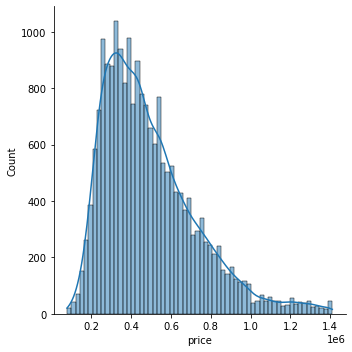

In [8]:
sns.displot(df.price, kde = True)

`price` is (unsurprisingly) skewed right and may need normalization, but let's run through the rest of the project with `price` as-is for now.

The final step of identifying and removing outliers will consist of plotting the physical locations of the houses on a map of the Seattle area, with the color of the houses indicating price. 

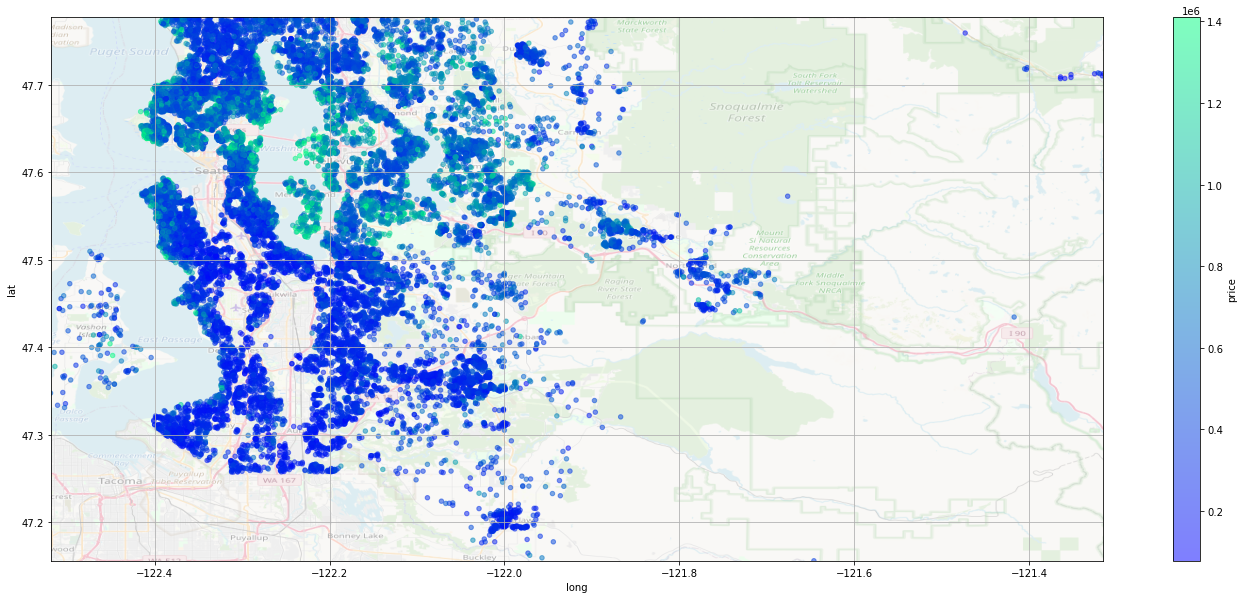

In [9]:
ax = df.plot.scatter('long', 'lat', c = 'price', zorder = 1, cmap = 'winter',figsize=(25, 10), alpha = .5, grid = True, sharex=False)

BBox = ((df.long.min(),df.long.max(), df.lat.min(), df.lat.max()))
 
mymap = plt.imread('map.png')

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal', alpha = .4)

There aren't many outliers, but there are few that can be seen on the eastern side of the map, starting with the house located in the southeast corner of the Snoqualmie Forest (top-right quadrant), moving east.

Remove these outliers by first identifying the longitude of the house in the southeast area of the Snoqualmie Forest.  
That house, and everything east of it, will be removed as outliers.

In [10]:
# Identify the longitude of the 'snoqualmie house' by finding the house with the largest (easternmost) 
# longitude value in it's respective cell on the map.

east_outliers = df[df.lat.between(47.5,47.6) & df.long.between(-121.8,-121.6)]
max_east = round(east_outliers.long.max(), 2)
max_east

-121.68

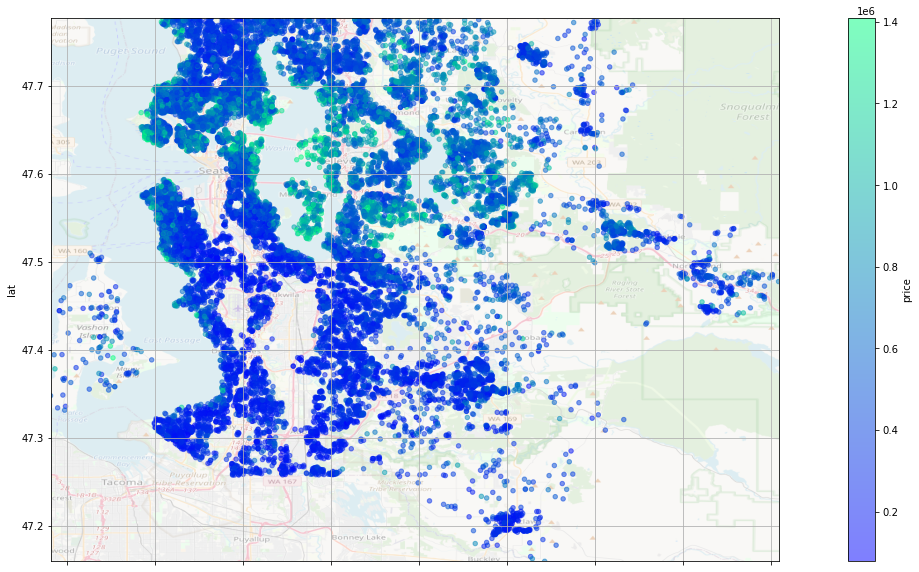

In [11]:
# Remove outliers.

east_outliers = df.loc[df['long'] > max_east]
df.drop(east_outliers.index, inplace = True)


# Replot map

ax = df.plot(kind = 'scatter', x='long', y='lat', c = 'price', zorder = 1, cmap = 'winter', 
             figsize=(25, 10), alpha = .5, grid = True)
ax.set_xlabel("long")
 
BBox = ((df.long.min(),df.long.max(), df.lat.min(), df.lat.max()))
 
mymap = plt.imread('map3.png')

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal', alpha = .4)

Now that all outliers have been removed, the DataFrame can now be reduced down to just the necessary  features.  
Recall, the features that will be used in this project are:  
`price` `bedrooms` `bathrooms` `sqft_living` `waterfront` `sqft_basement` `yr_renovated` and `zipcode` 

In [12]:
df = df.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_renovated', 'zipcode']]


df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_basement,yr_renovated,zipcode
0,221900.0,3,1.00,1180,0,0,0,98178
1,538000.0,3,2.25,2570,0,400,1991,98125
2,180000.0,2,1.00,770,0,0,0,98028
3,604000.0,4,3.00,1960,0,910,0,98136
4,510000.0,3,2.00,1680,0,0,0,98074


## Final Data Cleaning / EDA

Let's check for multicollinearity  by displaying a correlation matrix, using a threshold of .75.  

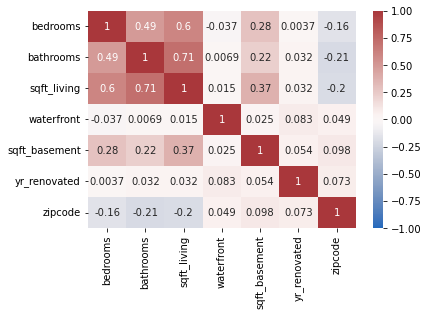

In [13]:
matrix = df.drop(columns = ['price'], axis = 1)
sns.heatmap(matrix.corr(), annot = True, vmax = 1, vmin = -1, center =0, cmap='vlag', fmt='.2g')
plt.show()

The collinearity threshold was not crossed, but the correlation between `sqft_living` and `bathrooms` did get close at .71.

Most consumers are not concerned with `basement` square footage, or *when* a house was specifically `renovated`. 
It would make more sense to change these to binary features, indicating whether a house *has* a basement and/or *was* renovated.

In [14]:
# Rename features to more accurately describe their purpose
df = df.rename(columns = {'sqft_basement': 'basement' , 'yr_renovated': 'renovated'})

# If renovated or basement have valuse lartger than zero, change value to 1 to indicated the presence of a basement/renovation
df.renovated = np.where(df.renovated > 0, 1, df.renovated)
df.basement = np.where(df.basement > 0, 1, df.basement)
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,basement,renovated,zipcode
0,221900.0,3,1.00,1180,0,0,0,98178
1,538000.0,3,2.25,2570,0,1,1,98125
2,180000.0,2,1.00,770,0,0,0,98028
3,604000.0,4,3.00,1960,0,1,0,98136
4,510000.0,3,2.00,1680,0,0,0,98074


Lastly, as `zipcode` is a categorical feature, use `get_dummies` to convert them into one hot encoded variables.

In [15]:
df = pd.get_dummies(df, columns = ['zipcode'], drop_first = True, prefix = '', prefix_sep='')
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,basement,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 2. MACHINE LEARNING

Now that the dataset has been properly cleaned, `train_test_split` the data and scale it.  
Scale the training data separately from the test data to avoid data leakage.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['price'], axis = 1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.38701039, -0.09153361, -0.39394699, ..., -0.07995676,
        -0.11747465, -0.11905259],
       [ 0.78975464,  0.62909466,  1.08516691, ..., -0.07995676,
        -0.11747465, -0.11905259],
       [ 1.96651966,  0.26878052,  1.25383779, ..., -0.07995676,
        -0.11747465,  8.39964955],
       ...,
       [ 0.78975464,  0.26878052,  1.64307829, ..., -0.07995676,
        -0.11747465, -0.11905259],
       [-0.38701039,  0.26878052,  1.02029349, ..., -0.07995676,
        -0.11747465,  8.39964955],
       [-0.38701039, -1.53279014, -0.92590901, ..., -0.07995676,
        -0.11747465, -0.11905259]])

Implement `ShuffleSplit` so that the mean `cross_val_score` can be obtained for each model.

In [17]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state = 42)

Time to train the models!  

After each model is trained, the `mean cross_val_score` `mean_absolute_error` `mean_squared_error` `root_mean_squared_error` and `r2` will be recorded. Results will be printed after the models have been trained. 


## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


lr = LinearRegression()
lr_score = cross_val_score(LinearRegression(), X_train, y_train, cv=cv).mean()

lr_fit = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_mae = metrics.mean_absolute_error(y_test, lr_pred)
lr_mse = metrics.mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
lr_r2 = metrics.r2_score(y_test, lr_pred)
lr_adj_r2 = 1 - (1-lr_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs = -1)
rfr_score = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=cv).mean()

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

rfr_mae = metrics.mean_absolute_error(y_test, rfr_pred)
rfr_mse = metrics.mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))
rfr_r2 = metrics.r2_score(y_test, rfr_pred)
rfr_adj_r2 = 1 - (1-rfr_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

## Support Vector Machine

In [20]:
from sklearn.svm import LinearSVR


svr = LinearSVR(max_iter=10000)
svr_score = cross_val_score(svr, X_train, y_train, cv=cv, n_jobs = -1).mean()

svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

svr_mae = metrics.mean_absolute_error(y_test, svr_pred)
svr_mse = metrics.mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, svr_pred))
svr_r2 = metrics.r2_score(y_test, svr_pred)
svr_adj_r2 = 1 - (1-svr_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

## XG Boost

In [21]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_score = cross_val_score(xgb, X_train, y_train, cv=cv, n_jobs = -1).mean()

xgb.fit(X_train, y_train)
xgb_pred = svr.predict(X_test)

xgb_mae = metrics.mean_absolute_error(y_test, xgb_pred)
xgb_mse = metrics.mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, xgb_pred))
xgb_r2 = metrics.r2_score(y_test, xgb_pred)
xgb_adj_r2 = 1 - (1-xgb_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


# 3. PRELIMINARY RESULTS

In [22]:
# Display results

results = pd.DataFrame({'Linear Reg': [lr_score, lr_r2, lr_adj_r2],
                        'Random Forest': [rfr_score, rfr_r2, rfr_adj_r2],
                        'Suppor Vector': [svr_score, svr_r2, svr_adj_r2],
                        'XGBoost': [xgb_score, xgb_r2, xgb_adj_r2]
                       },
                    
                       index = ['cross val score', 'r2' ,'Adjusted r2'])

# Add 'Best Score' column
pd.options.display.float_format = '{:.2f}'.format

results['Best Results'] = results.idxmax(axis=1)


results1 = pd.DataFrame({'Linear Reg': [lr_mae, lr_mse, lr_rmse],
                        'Random Forest': [rfr_mae, rfr_mse, rfr_rmse],
                        'Suppor Vector': [svr_mae, svr_mse, svr_rmse],
                        'XGBoost': [xgb_mae, xgb_mse, xgb_rmse]
                        },
                    
                       index = ['mae', 'mse', 'rmse'])

# Add 'Best Score' column
pd.options.display.float_format = '{:.2f}'.format

results1['Best Results'] = results1.idxmin(axis=1)

display(results)
display(results1)

,Linear Reg,Random Forest,Suppor Vector,XGBoost,Best Results
cross val score,0.79,0.77,0.39,0.79,XGBoost
r2,0.77,0.75,0.36,0.36,Linear Reg
Adjusted r2,0.77,0.74,0.35,0.35,Linear Reg


,Linear Reg,Random Forest,Suppor Vector,XGBoost,Best Results
mae,79234.68,80629.59,143337.95,143337.95,Linear Reg
mse,12331391958.79,13739459222.10,34848755368.75,34848755368.75,Linear Reg
rmse,111046.80,117215.44,186678.21,186678.21,Linear Reg


As suspected, the Linear Regression model performed the best due to the linear nature of the data.
In fact, the Linear Regression model performed the best across all metrics and tied with the XGBoost model for `cross_val_score`.

The Random Forest model also performed extremely well, performing just about as well the Linear Regression model. A marked decrease in performance seen in the Support Vector and XG Boost models. 

The `cross_val_score` and `r2` scores being 79% and 77% respectively, is encouraging as it means that our model isn't overfitting. However, even as though those scores approach 80%, the accuracy of model is insufficient for it to be utilized in practice. This can be illustrated by the model's `MAE` value of roughly \\$79,000. As it relates to housing prices, a mean error of \\$79,000 in predicted price is significant.  

That being said, as the Linear Regression model performed the best, let's test the four assumptions of Linear Regression. 

## Testing Linear Regression Assumptions

The four assumptions of Linear Regression are: 
1. Linear Relationship
2. Little/No Collinearity
3. Homoscedasticity
4. Normal Distribution of Residuals

The EDA portion of this project confirmed that the first two assumptions were present:  
1. Linear relationship in the data: Confirmed with the `pair_plot`. 
2. Little/no collinearity: Confirmed with the correlation matrix. No correlation over .75 threshold.

Let's test the other two assumptions.

### Homoscedasticity

Text(0.5, 0.99, 'Residuals Scatterplot')

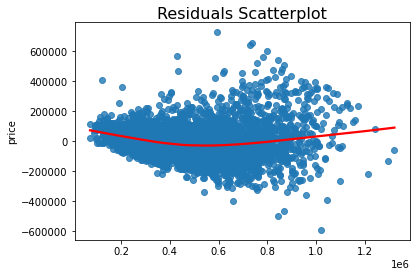

In [23]:
# Plot Residuals

residuals = y_test - lr_pred
sns.regplot(x=lr_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

As can be seen from the residual scatterplot above, heteroscedasticity is clearly present, thus violating the assumption.

### Normality

0.9481589175128967

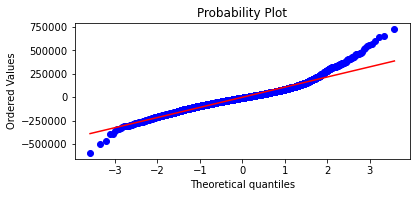

In [24]:
# Plot residuals on a probplot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)
r**2

Departure from the fitted line is occurring  within both tails, but more-so on on the right side of the plot. This violates the normality assumption.
<br><br>  

Recall that the label data `price` did not follow a normal distribution. Let's log-transform `price` and see if that positively impacts homoscedasticity and normality. 

# 4. TRANSFORM 'PRICE' & RETRAIN MODEL

<AxesSubplot:title={'center':'Price After Log Transform'}, xlabel='price', ylabel='Count'>

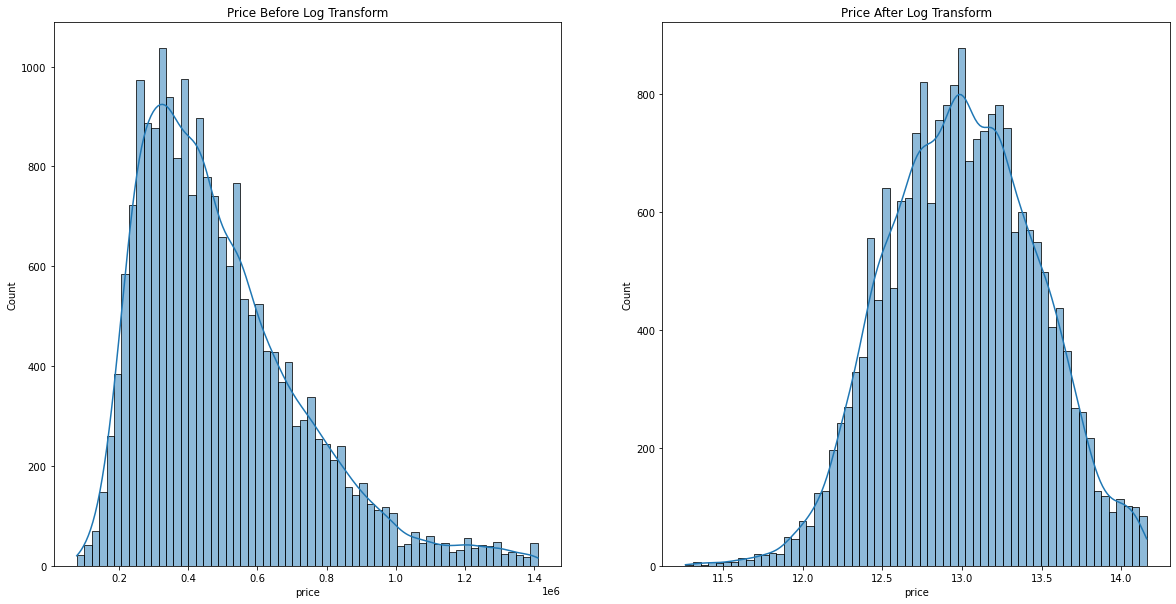

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
ax1.title.set_text('Price Before Log Transform')
sns.histplot(df.price, kde = True, ax= ax1)

ax2.title.set_text('Price After Log Transform')
df.price = np.log(df.price)
sns.histplot(df.price, kde = True, ax= ax2)

the histograms above show `price` before and after the log-transform. The log-transform did help normalize the distribution a bit, but it still doesn't look great. let's proceed with retraining the Linear Regression model. 

To do so, `train_test_split` needs to happen again as `price` was transformed.

In [26]:
# Assign log-transfomred price to 'y' and create new train/test set

y_log = df.price
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size = .2, random_state = 42)

Retrain the model.   
**Note**: All the metrics have to be recalculated due to the log-transform.

In [27]:
# Retrain the Linear Regression Model
lr_norm = LinearRegression()
lr_norm_score = cross_val_score(LinearRegression(), X_train, y_log_train, cv=cv).mean()

lr_norm_fit = lr_norm.fit(X_train, y_log_train)
lr_norm_pred = lr_norm.predict(X_test)

# invert log-transformed data for apples-to-apples results comparison
inv_y_test = np.expm1(y_log_test)
inv_lr_pred = np.expm1(lr_norm_pred)

#calc r2, mae, and residuals
lr_norm_r2 = metrics.r2_score(inv_y_test, inv_lr_pred)
lr_norm_mae = metrics.mean_absolute_error(inv_y_test, inv_lr_pred)
residuals_norm = y_log_test - lr_norm_pred

In [28]:
inv_lr_pred

array([ 270083.41401632,  517048.03447659,  895493.97840476, ...,
       1155107.25443342,  871968.1664225 ,  503462.90142519])

Because `price` was log-transformed, we must calculate `r2` and `MAE` on the inverted log values in order to compare the models
apples-to-apples.  
**R-squared** is the ratio of explained variance to the total variance, and the variances of y and log y are different due to the log-transform.  
**MAE** is calculated as a log-value. Inverting it allows for a dollars-to-dollars comparison.





In [29]:
# Display results

results2 = pd.DataFrame({'Linear Reg Before Transform': [lr_score, lr_r2],
                        'Linear Reg After Transform': [lr_norm_score, lr_norm_r2]
                       },
                    
                       index = ['cross val score', 'r2'])

# Add 'Best Score' column
pd.options.display.float_format = '{:.2f}'.format

results2['Best Results'] = results2.idxmax(axis=1)


results3 = pd.DataFrame({'Linear Reg Before Transform': [lr_mae],
                        'Linear Reg After Transform': [lr_norm_mae]
                        },
                    
                       index = ['mae'])

# Add 'Best Score' column
pd.options.display.float_format = '{:.2f}'.format

results3['Best Results'] = results3.idxmin(axis=1)

display(results2)
display(results3)

,Linear Reg Before Transform,Linear Reg After Transform,Best Results
cross val score,0.79,0.81,Linear Reg After Transform
r2,0.77,0.78,Linear Reg After Transform


,Linear Reg Before Transform,Linear Reg After Transform,Best Results
mae,79234.68,73793.14,Linear Reg After Transform


Log transforming `price` did seem to help with the model's accuracy, but only slightly.  
`cross_val_score` increase by 2 percentage points.    
`r2` increased by 1 percentage point.    
`MAE` reduced the mean error in predictions by roughly $5,400.  

Let's see how this affected Homoscedasticity and Normality.

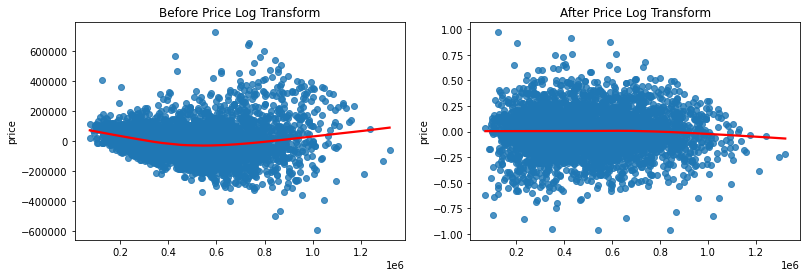

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 4))

sns.regplot(x=lr_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, ax = ax1)
ax1.title.set_text('Before Price Log Transform')

sns.regplot(x=lr_pred, y=residuals_norm, lowess=True, line_kws={'color': 'red'}, ax = ax2)
ax2.title.set_text('After Price Log Transform')

As can be seen in the plots above, log-transforming `price` did result in more Homoscedasticity overall, but some heteroscedasticity can now be seen on the right side of the 'after' plot.

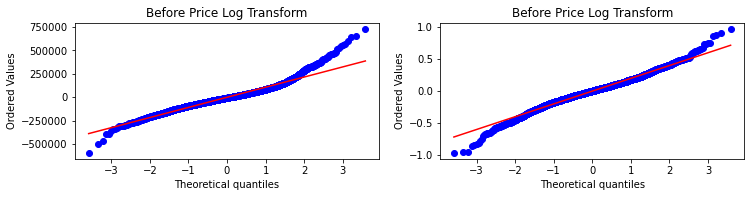

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 2.5))

_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax1, fit=True)
ax1.title.set_text('Before Price Log Transform')


_, (__, ___, r) = sp.stats.probplot(residuals_norm, plot=ax2, fit=True)
ax2.title.set_text('Before Price Log Transform')


Overall, the log-transform did result in a closer approximation to normality overall, with *slightly more* departure from the fitted line occurring on the left side of the plot, and *significantly less* departure from the fitted line occurring on the right side of the plot. 

# 5. CONCLUSION

To briefly recap, after training four different regression models, the Linear Regression model performed the best. As the best performing model was Linear Regression, the four assumptions of Linear Regression were tested. Two assumptions were found to have been violated (Homoscedasticity and Normality). 

In an effort to possibly increase the robustness of the model and meet all four assumptions, the label data `price` was log-transformed, and the Linear Regression model was retrained. Below is a recap of the improvements:  

`cross_val_score` increase by 2 percentage points, from .79 to .81      
`r2` increased by 1 percentage point, from .77 to .78  
`MAE` dropped from \\$79,234 to \\$73,793, increasing the accuracy of predictions by roughly $5,400, on average. 

Log-transforming `price` did lead to improved Homoscedasiticity an Normality, however, the improvements were not significant enough to consider all four assumptions of Linear Regression as having been met. 

Given that the primary goal of this project is to push this model into a production environment (ie - similar to a  Zillow web app), where a user receives a price prediction after entering basic housing criteria, only commonly understood/known features of houses were able to be used in the model (sqft, bedrooms, etc.). For example, sqft_living_15 was not able to be used as the average consumer does not know the average square footage of their 15 closest neighbors. This reduced feature-set did impact accuracy. 

That being said, I do believe the accuracy of the model(s) can be improved with the following measures:
1. Adding more data (data from additional years)
2. Adding features from other data sources (proximity to schools, parks, shopping, etc)
3. Hyperparameter Tuning

# 6. EXPORT MODEL FOR DEPLOYMENT

Create a function to take inputs and return predicted price from the Linear Regression model.

In [32]:
def predict_price (bedrooms, bathrooms, sqft_living, waterfront, basement, renovated, zipcode):
    
    # get index for input zipcode
    zip_index = np.where(X_test.columns==zipcode)[0][0]
    
    # create an zero'd-out array the length of X_test
    x = np.zeros(len(X_test.columns))
    
    # assign fuction arguments to array elements
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft_living
    x[3] = waterfront
    x[4] = basement
    x[5] = renovated

    # assign the input zipcode the value of 1
    if zip_index >= 0:
       x[zip_index] = 1
    
    # return predicted price 
    return np.expm1(lr_norm.predict([x])[0])

Test `predict_price` function/model. Look at first record of X_test.

In [33]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,waterfront,basement,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1522,3,2.00,1690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Pass the corresponding values as arguments to `predict_price` and evaluate results.

In [34]:
# assign predicted price to x
x = predict_price(3, 2, 1690, 0, 0, 0, '98042')

print('Predicted Price: ', x.astype(int))
print('Actual Price: ', y_test[1522].astype(int))
print('Difference:', x.astype(int) - y_test[1522].astype(int))

Predicted Price:  270083
Actual Price:  337000
Difference: -66917


The function and model are working properly.  
The model's predicted price is \\$66,917 below the actual sale price.  
This residual is acceptable for the purposes of this project as it is in line with the model's MAE of \$73,793.14

Export columns of X as a JSON file.

In [35]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))


Export model.

In [36]:
import pickle
with open('Linear_Reg_Normalized.pickle', 'wb') as f:
    pickle.dump(lr_norm, f)